In [252]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
sb.set()

# 12.11

In [253]:
df = pd.read_csv('League of Legends Champion Stats 12.11.csv', header = 0, delimiter=',')
df.head()
print(df.columns)

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win',
       'Role pick rate', 'Pick', 'Ban', 'KDA', 'Buffed', 'Nerfed'],
      dtype='object')


In [254]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (241, 13)


In [255]:
name = pd.DataFrame(df['Name'])
win = pd.DataFrame(df['Win'])
ban = pd.DataFrame(df['Ban'])
pick = pd.DataFrame(df['Pick'])
Class = pd.DataFrame(df['Class'])
buffed = pd.DataFrame(df['Buffed'])
nerfed = pd.DataFrame(df['Nerfed'])

In [256]:
jointDF = pd.concat([name, Class, win, ban, pick, buffed, nerfed], axis = 1).reindex(pick.index)
jointDF.head()

,Name,Class,Win,Ban,Pick,Buffed,Nerfed
0,Aatrox,Fighter,48.94,5.43,7.31,0,0
1,Ahri,Mage,50.04,8.59,9.83,0,0
2,Akali,Assassin,48.70,11.79,6.26,0,0
3,Akali,Assassin,47.58,11.79,2.67,0,0
4,Akshan,Marksman,49.50,7.60,2.93,0,0


Correlation between Buffed and Winrate: -0.1689648665263428


<Axes: xlabel='Buffed', ylabel='Win'>

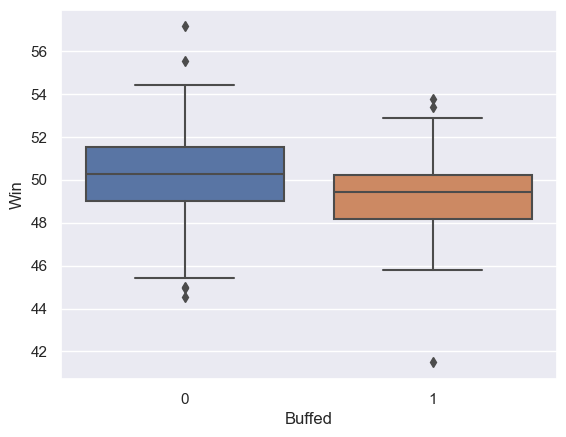

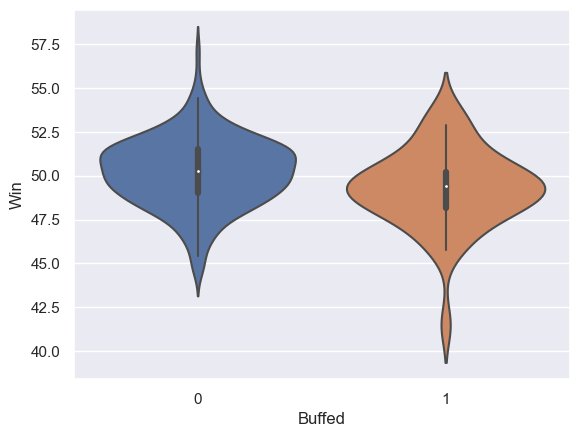

In [257]:
corr_bw = jointDF['Buffed'].corr(jointDF['Win'])
print("Correlation between Buffed and Winrate:", corr_bw)
sns.boxplot(x="Buffed", y="Win", data=df)
fig, ax = plt.subplots()
sns.violinplot(x="Buffed", y="Win", data=df)

Correlation between Nerfed and Winrate: 0.16260772214724425


<Axes: xlabel='Nerfed', ylabel='Win'>

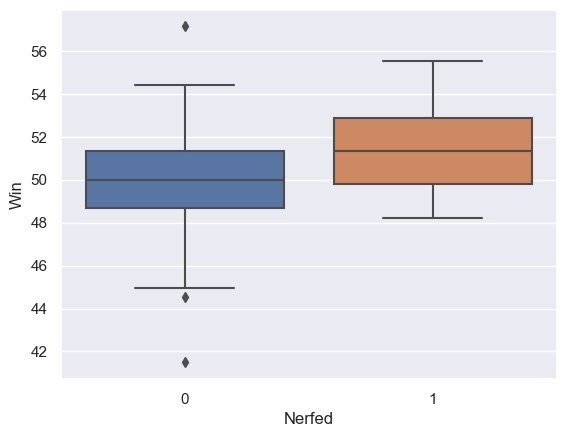

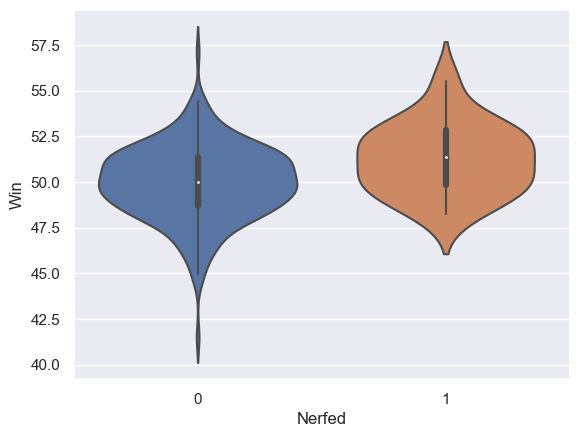

In [258]:
corr_nw = jointDF['Nerfed'].corr(jointDF['Win'])
print("Correlation between Nerfed and Winrate:", corr_nw)
sns.boxplot(x="Nerfed", y="Win", data=df)
fig, ax = plt.subplots()
sns.violinplot(x="Nerfed", y="Win", data=df)

Correlation between Buffed and Pickrate: -0.2447752623522998


<Axes: xlabel='Buffed', ylabel='Pick'>

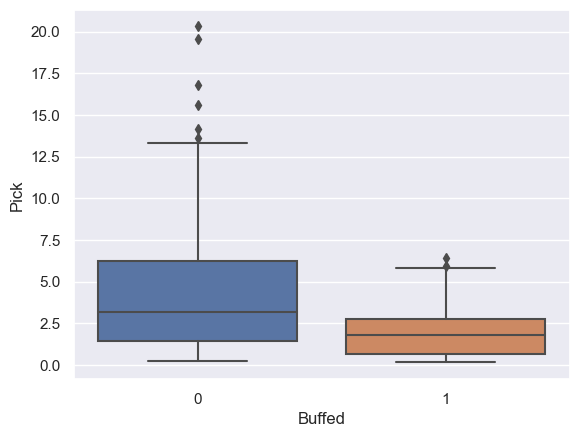

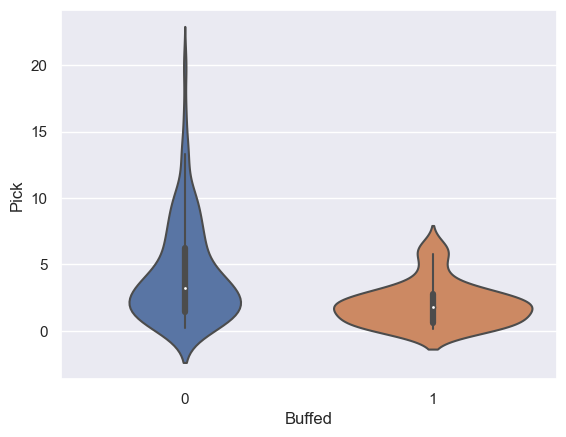

In [259]:
corr_bp = jointDF['Buffed'].corr(jointDF['Pick'])
print("Correlation between Buffed and Pickrate:", corr_bp)
sns.boxplot(x="Buffed", y="Pick", data=df)
fig, ax = plt.subplots()
sns.violinplot(x="Buffed", y="Pick", data=df)

Correlation between Nerfed and Pickrate: 0.23919594989103415


<Axes: xlabel='Nerfed', ylabel='Pick'>

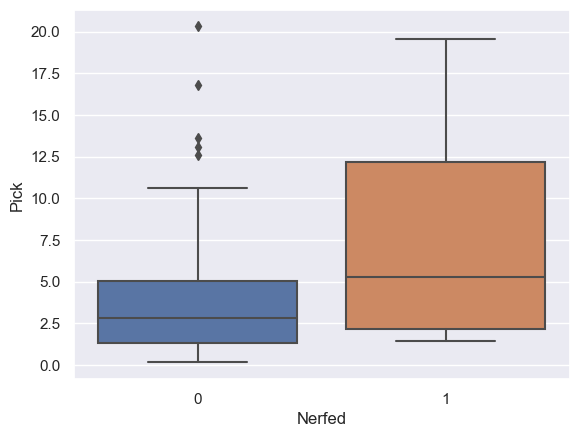

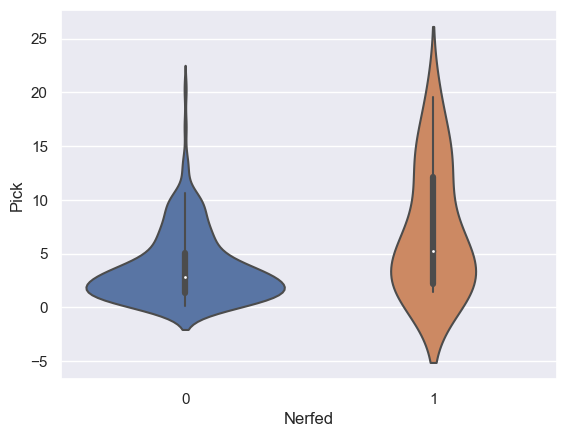

In [260]:
corr_np = jointDF['Nerfed'].corr(jointDF['Pick'])
print("Correlation between Nerfed and Pickrate:", corr_np)
sns.boxplot(x="Nerfed", y="Pick", data=df)
fig, ax = plt.subplots()
sns.violinplot(x="Nerfed", y="Pick", data=df)

Correlation between Buffed and Banrate: -0.1578177956346355


<Axes: xlabel='Buffed', ylabel='Ban'>

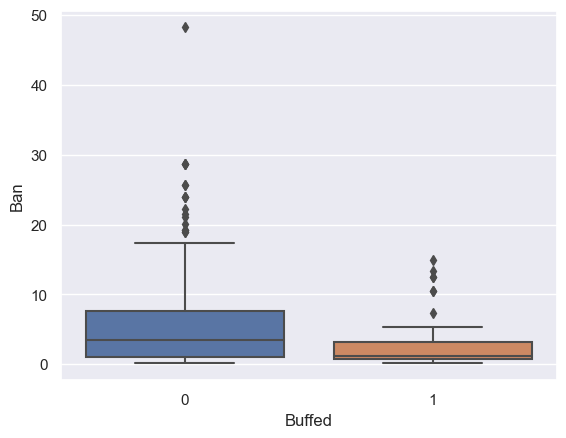

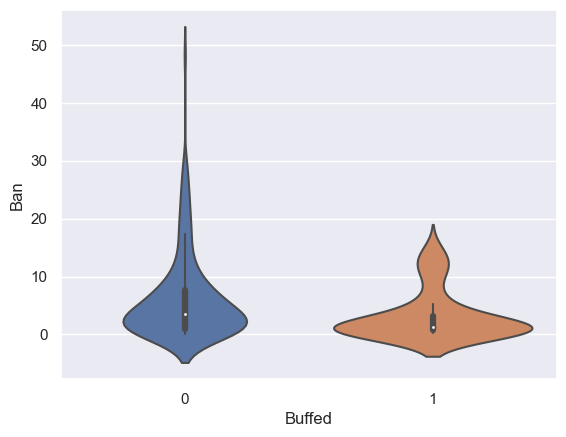

In [261]:
corr_bb = jointDF['Buffed'].corr(jointDF['Ban'])
print("Correlation between Buffed and Banrate:", corr_bb)
sns.boxplot(x="Buffed", y="Ban", data=df)
fig, ax = plt.subplots()
sns.violinplot(x="Buffed", y="Ban", data=df)

Correlation between Nerfed and Pickrate: 0.18398308286196705


<Axes: xlabel='Nerfed', ylabel='Ban'>

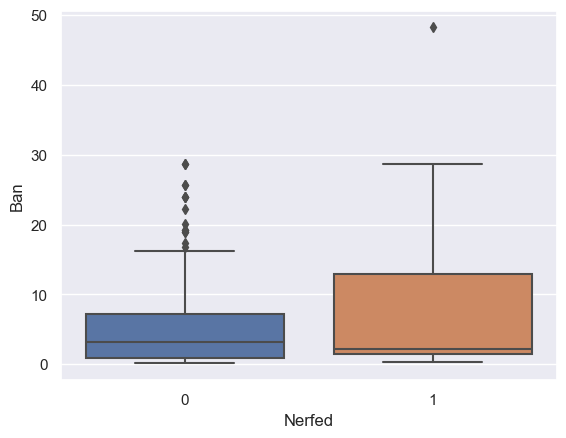

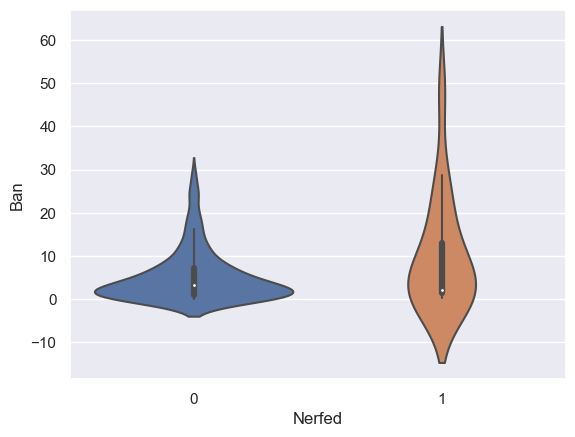

In [262]:
corr_nb = jointDF['Nerfed'].corr(jointDF['Ban'])
print("Correlation between Nerfed and Pickrate:", corr_nb)
sns.boxplot(x="Nerfed", y="Ban", data=df)
fig, ax = plt.subplots()
sns.violinplot(x="Nerfed", y="Ban", data=df)

<Axes: >

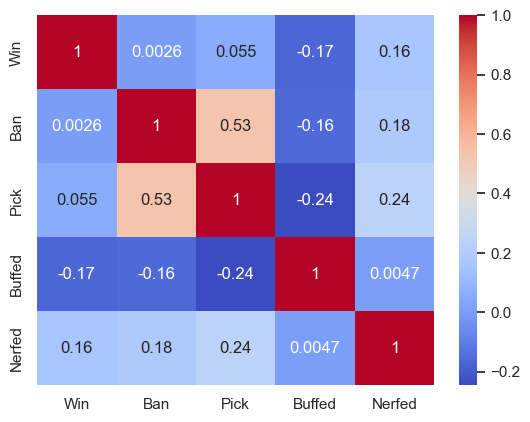

In [263]:
corr_matrix = jointDF.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Weighted average using correlation between win, pick, ban, and buffed

In [264]:
df["weighted buff"] = (corr_bw*df["Win"] + corr_bp*df["Pick"] + corr_bb*df["Ban"]) / (corr_bw + corr_bp + corr_bb)

### Weighted average using correlation between win, pick, ban, and nerfed

In [265]:
df["weighted nerf"] = (corr_nw*df["Win"] + corr_np*df["Pick"] + corr_nb*df["Ban"]) / (corr_nw + corr_np + corr_nb)

### For scatterplot, green indicates buffed, red indicates nerfed, black for neither buffed nor nerfed.

### Data using weighted average from buffed

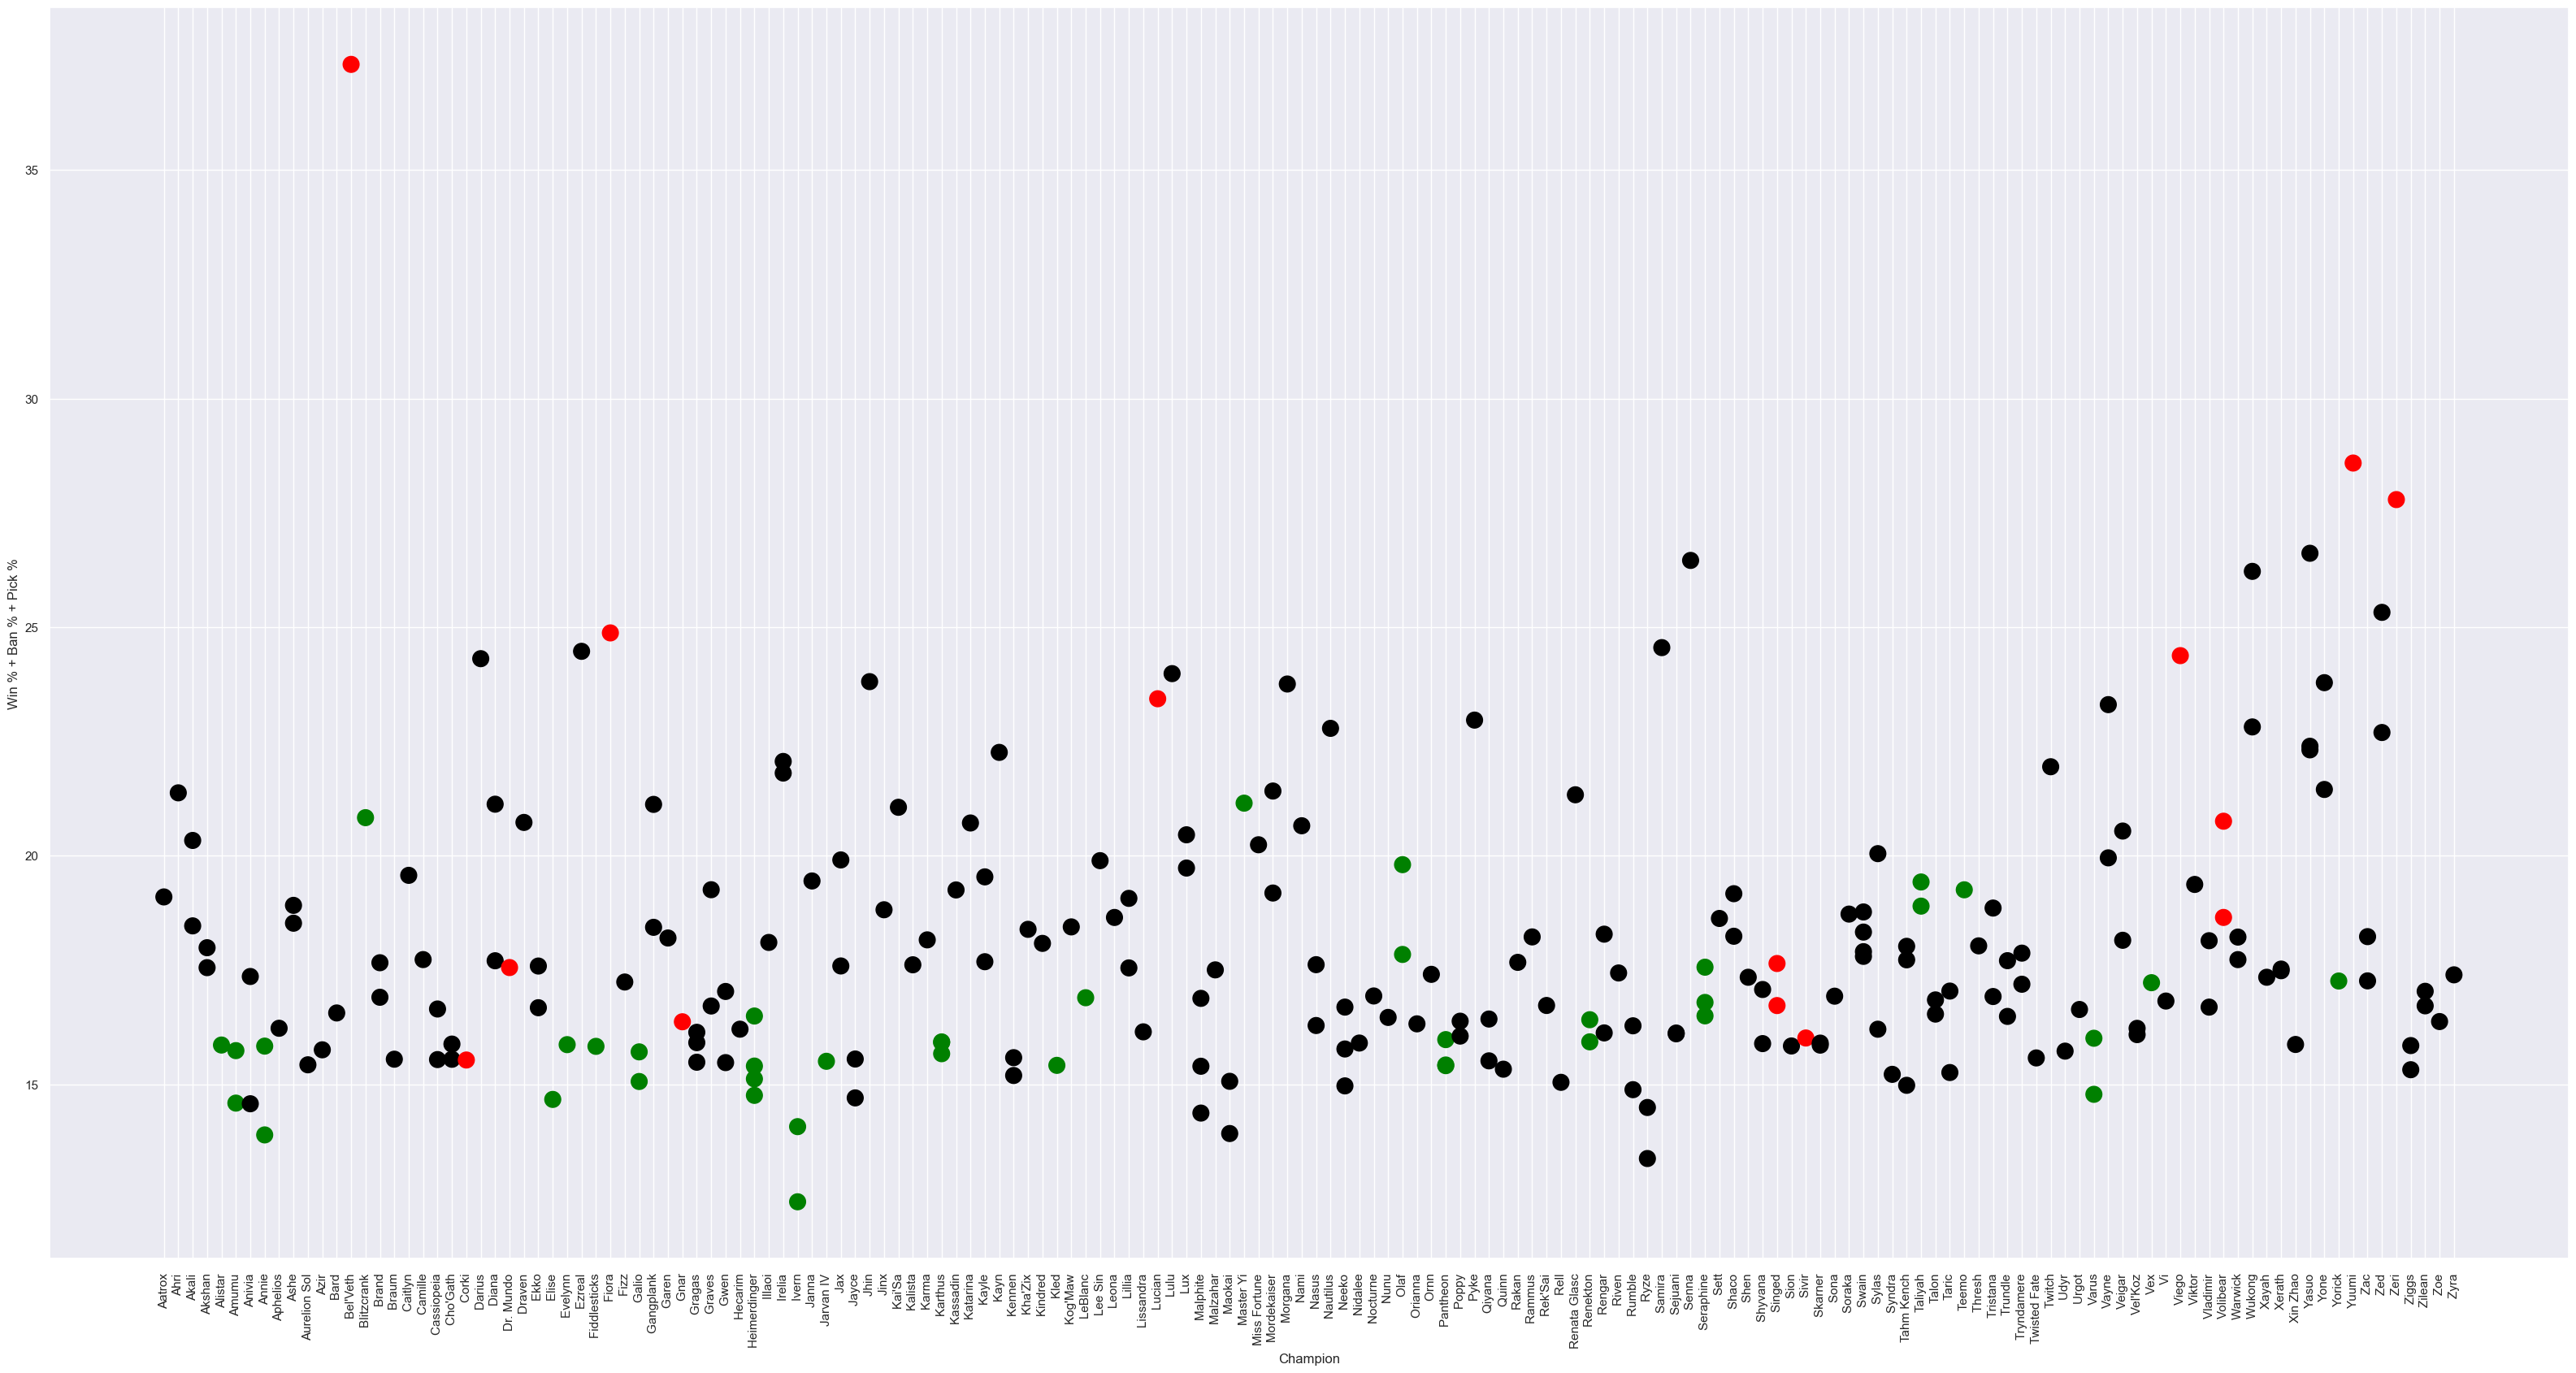

In [266]:
f, axes = plt.subplots(figsize=(40, 20))
df['Buffed_or_Nerfed'] = np.where(df['Buffed'] == 1, 'Buffed', np.where(df['Nerfed'] == 1, 'Nerfed', 'None'))

plt.scatter(df['Name'], df['weighted buff'], c=df['Buffed_or_Nerfed'].map({'Buffed': 'green', 'Nerfed': 'red', 'None': 'black'}), s=200)
plt.xticks(rotation=90)
plt.xlabel('Champion')
plt.ylabel('Win % + Ban % + Pick %')
plt.show()

In [267]:
df_sorted = df.sort_values(by='weighted buff', ascending=False)
pd.options.display.max_rows = None
print(df_sorted[['Name', 'Class', 'weighted buff']].reset_index(drop=True).rename(columns={'WinBanPick': 'Ranking'}))

              Name      Class  weighted buff
0        Bel'Veth    Fighter       37.309281
1           Yuumi    Support       28.588609
2            Zeri   Marksman       27.789314
3           Yasuo    Fighter       26.614997
4           Senna   Marksman       26.458714
5          Wukong    Fighter       26.219248
6             Zed   Assassin       25.322515
7           Fiora    Fighter       24.872953
8          Samira   Marksman       24.551340
9          Ezreal   Marksman       24.470158
10          Viego   Assassin       24.375938
11         Darius    Fighter       24.309457
12           Lulu    Support       23.982307
13           Jhin   Marksman       23.807108
14           Yone   Assassin       23.784564
15        Morgana       Mage       23.755065
16         Lucian   Marksman       23.432645
17          Vayne   Marksman       23.304257
18           Pyke    Support       22.965681
19         Wukong    Fighter       22.816340
20       Nautilus       Tank       22.785226
21        

### Data using weighted average from nerfed

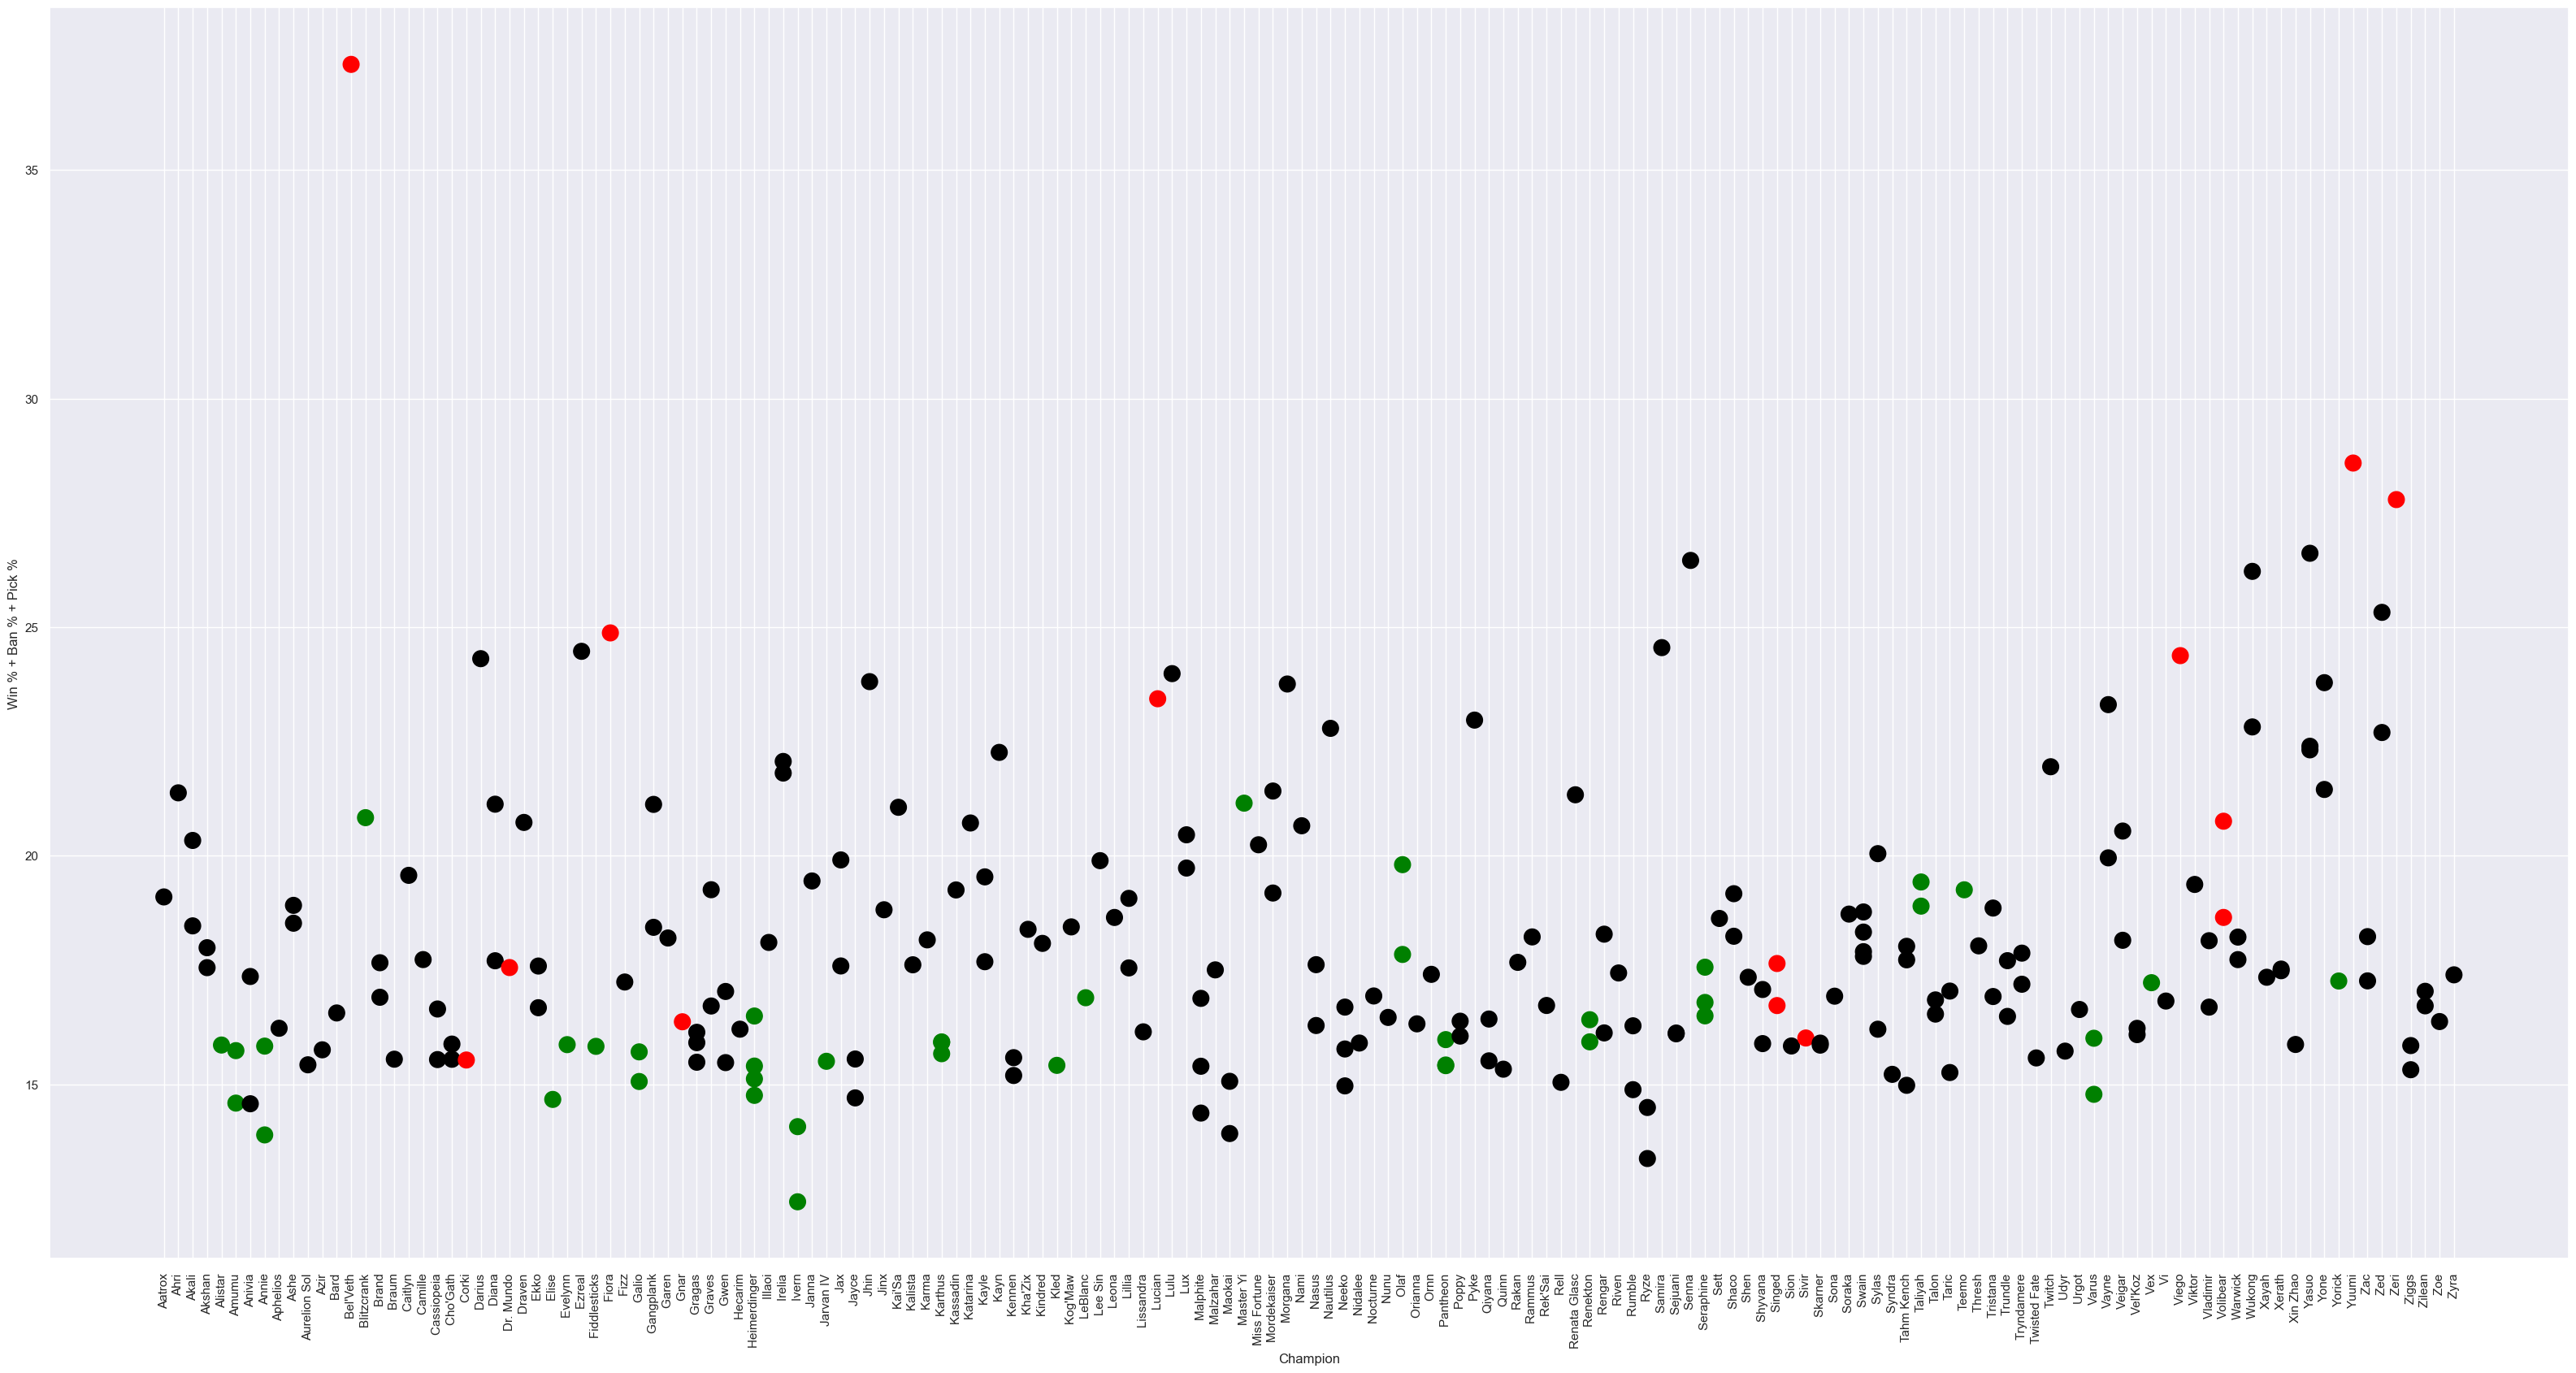

In [299]:
f, axes = plt.subplots(figsize=(40, 20))

plt.scatter(df['Name'], df['weighted buff'], c=df['Buffed_or_Nerfed'].map({'Buffed': 'green', 'Nerfed': 'red', 'None': 'black'}), s=200)
plt.xticks(rotation=90)
plt.xlabel('Champion')
plt.ylabel('Win % + Ban % + Pick %')
plt.show()

In [300]:
df5_sorted = df.sort_values(by='weighted nerf', ascending=False)
pd.options.display.max_rows = None
print(df5_sorted[['Name', 'Class', 'weighted nerf']].reset_index(drop=True).rename(columns={'WinBanPick': 'Ranking'}))

              Name      Class  weighted nerf
0        Bel'Veth    Fighter       37.796135
1           Yuumi    Support       28.500704
2            Zeri   Marksman       27.350044
3           Yasuo    Fighter       26.384288
4          Wukong    Fighter       26.072974
5           Senna   Marksman       26.027875
6             Zed   Assassin       25.397270
7           Fiora    Fighter       24.588080
8          Samira   Marksman       24.170530
9          Darius    Fighter       23.939158
10          Viego   Assassin       23.687671
11        Morgana       Mage       23.563376
12           Lulu    Support       23.534450
13         Ezreal   Marksman       23.366936
14           Yone   Assassin       23.242347
15            Zed   Assassin       22.896078
16         Wukong    Fighter       22.840338
17          Vayne   Marksman       22.826029
18           Jhin   Marksman       22.733056
19         Lucian   Marksman       22.731247
20           Pyke    Support       22.543552
21        

# 12.14 

In [ ]:
df2 = pd.read_csv('League of Legends Champion Stats 12.14.csv', header = 0, delimiter=',')
df.head()
print(df.columns)

In [ ]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

In [ ]:
name = pd.DataFrame(df2['Name'])
win = pd.DataFrame(df2['Win'])
ban = pd.DataFrame(df2['Ban'])
pick = pd.DataFrame(df2['Pick'])
Class = pd.DataFrame(df2['Class'])
buffed = pd.DataFrame(df2['Buffed'])
nerfed = pd.DataFrame(df2['Nerfed'])

In [ ]:
jointDF = pd.concat([name, Class, win, ban, pick, buffed, nerfed], axis = 1).reindex(pick.index)
jointDF.head()

In [ ]:
df2["weighted buff"] = (corr_bw*df2["Win"] + corr_bp*df2["Pick"] + corr_bb*df2["Ban"]) / (corr_bw + corr_bp + corr_bb)
df2["weighted nerf"] = (corr_nw*df2["Win"] + corr_np*df2["Pick"] + corr_nb*df2["Ban"]) / (corr_nw + corr_np + corr_nb)

# 12.14 rankings with weighted average for buffed from 12.11

In [ ]:
f, axes = plt.subplots(figsize=(40, 20))
df2['Buffed_or_Nerfed'] = np.where(df2['Buffed'] == 1, 'Buffed', np.where(df2['Nerfed'] == 1, 'Nerfed', 'None'))

plt.scatter(df2['Name'], df2['weighted buff'], c=df2['Buffed_or_Nerfed'].map({'Buffed': 'green', 'Nerfed': 'red', 'None': 'black'}), s=200)
plt.xticks(rotation=90)
plt.xlabel('Champion')
plt.ylabel('Win % + Ban % + Pick %')
plt.show()

In [ ]:
df2_sorted = df2.sort_values(by='weighted buff', ascending=False)
pd.options.display.max_rows = None
print(df2_sorted[['Name', 'Class', 'weighted buff']].reset_index(drop=True).rename(columns={'WinBanPick': 'Ranking'}))

# 12.14 rankings with weighted average for nerfed from 12.11

In [ ]:
f, axes = plt.subplots(figsize=(40, 20))

plt.scatter(df2['Name'], df2['weighted nerf'], c=df2['Buffed_or_Nerfed'].map({'Buffed': 'green', 'Nerfed': 'red', 'None': 'black'}), s=200)
plt.xticks(rotation=90)
plt.xlabel('Champion')
plt.ylabel('Win % + Ban % + Pick %')
plt.show()

In [ ]:
df2_sorted = df2.sort_values(by='weighted nerf', ascending=False)
pd.options.display.max_rows = None
print(df2_sorted[['Name', 'Class', 'weighted nerf']].reset_index(drop=True).rename(columns={'WinBanPick': 'Ranking'}))

# Anomaly detection for 12.11 weighted buff

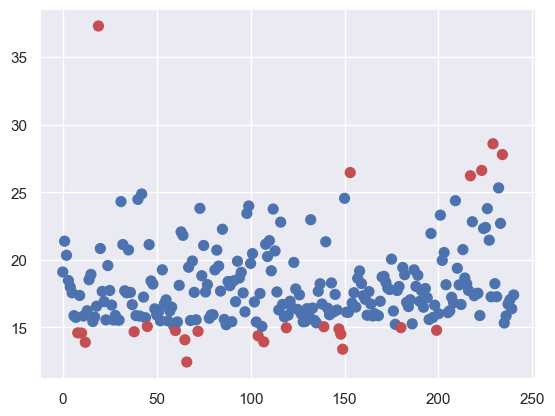

In [297]:
scaler = StandardScaler()
X = scaler.fit_transform(df[["weighted buff"]])
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df['is_outlier'] = y_pred == -1

plt.scatter(df.index, df["weighted buff"], c=['r' if i == 1 else 'b' for i in df['is_outlier']], s=50.)
plt.show()


In [298]:
anomalies = df[df['is_outlier']]
anomaly_names = anomalies[['Name', 'weighted buff']]
print(anomaly_names)

              Name  weighted buff
8           Amumu       14.587576
10         Anivia       14.573244
12          Annie       13.891724
19       Bel'Veth       37.309281
38          Elise       14.668124
45          Galio       15.060135
60   Heimerdinger       14.756747
65          Ivern       14.072741
66          Ivern       12.428982
72          Jayce       14.701310
104      Malphite       14.369237
107        Maokai       13.922022
119         Neeko       14.964194
139          Rell       15.042041
147        Rumble       14.881409
148          Ryze       14.491615
149          Ryze       13.375317
153         Senna       26.458714
180    Tahm Kench       14.976716
199         Varus       14.779723
217        Wukong       26.219248
223         Yasuo       26.614997
229         Yuumi       28.588609
234          Zeri       27.789314
